# Project Description:
The goal of this project is to find the best classifier for individuals whose income is <=50K and >50K
As a result, I will try the following classifiers:
1. Decision Tree
2. Logistic Regression
3.  SVM
4. K-Nearest Neighbors

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

## Load Data
This dataset was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html

The goal is to create a classification model that predict which individuals will have an income greater than 50K and which individuals will have an income less than 50K based on different characteristics such as 'age', 'years of education', 'occupation', 'martial status', etc.

In [3]:
# The code was removed by Watson Studio for sharing.

,Age,work-class,Income,Education,Education_years,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Peform data exploration

In [4]:
# Here I want to know the shape of the data
df_census.shape

(32561, 15)

In [5]:
# I want to see what the column names
df_census.columns

Index(['Age', 'work-class', 'Income', 'Education', 'Education_years',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Native_country',
       'Class'],
      dtype='object')

In [6]:
# I want to see how many values in each class
df_census['Class'].value_counts()

 <=50K    24720
 >50K      7841
Name: Class, dtype: int64

In [5]:
# I want to know the summary stats for each feature
df_census.describe()

,Age,Income,Education_years,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Here I wan to group by years of education and see descriptive stats and distribution for 'Age'
# It's easier to read and analyze

grouped_age = df_census.groupby(['Education_years'])
grouped_age['Age'].describe().unstack()

       Education_years
count  1                     51.000000
       2                    168.000000
       3                    333.000000
       4                    646.000000
       5                    514.000000
       6                    933.000000
       7                   1175.000000
       8                    433.000000
       9                  10501.000000
       10                  7291.000000
       11                  1382.000000
       12                  1067.000000
       13                  5355.000000
       14                  1723.000000
       15                   576.000000
       16                   413.000000
mean   1                     42.764706
       2                     46.142857
       3                     42.885886
       4                     48.445820
       5                     41.060311
       6                     37.429796
       7                     32.355745
       8                     32.000000
       9                     38.974479
  

In [7]:
# I want to analyze at Income and Education Years

grouped_age = df_census.groupby(['Education_years'])
grouped_age['Income'].describe().unstack()

       Education_years
count  1                  5.100000e+01
       2                  1.680000e+02
       3                  3.330000e+02
       4                  6.460000e+02
       5                  5.140000e+02
       6                  9.330000e+02
       7                  1.175000e+03
       8                  4.330000e+02
       9                  1.050100e+04
       10                 7.291000e+03
       11                 1.382000e+03
       12                 1.067000e+03
       13                 5.355000e+03
       14                 1.723000e+03
       15                 5.760000e+02
       16                 4.130000e+02
mean   1                  2.358894e+05
       2                  2.393030e+05
       3                  2.324483e+05
       4                  1.880792e+05
       5                  2.024851e+05
       6                  1.968325e+05
       7                  1.949281e+05
       8                  1.990975e+05
       9                  1.895387e+05
  

In [7]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    ca-certificates-2019.5.15  |                1         134 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0       --> 2019.5.15-1      anaconda
    certifi:         2019.6.16-py36_1  --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h7b6447c_1 --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0     

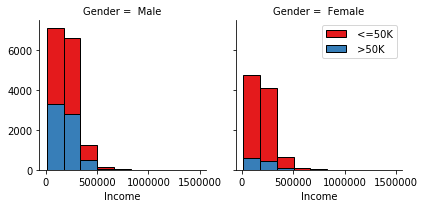

In [10]:
import seaborn as sns

bins = np.linspace(df_census.Income.min(), df_census.Income.max(), 10)
g = sns.FacetGrid(df_census, col="Gender", hue="Class", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Income', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

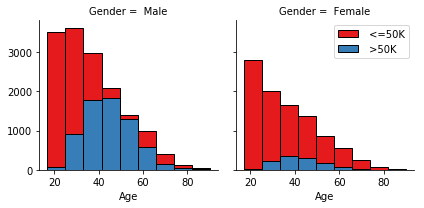

In [11]:
bins = np.linspace(df_census.Age.min(), df_census.Age.max(), 10)
g = sns.FacetGrid(df_census, col="Gender", hue="Class", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [12]:
df_census.groupby(['Gender'])['Class'].value_counts(normalize=True)

Gender   Class 
 Female   <=50K    0.890539
          >50K     0.109461
 Male     <=50K    0.694263
          >50K     0.305737
Name: Class, dtype: float64

# 
Data shows only 10% of females make over 50K and 31% for males

In [15]:
# I want to see income percentages for each age group
df_census.groupby(['Age'])['Class'].value_counts(normalize=True)

Age  Class 
17    <=50K    1.000000
18    <=50K    1.000000
19    <=50K    0.997191
      >50K     0.002809
20    <=50K    1.000000
21    <=50K    0.995833
      >50K     0.004167
22    <=50K    0.983007
      >50K     0.016993
23    <=50K    0.986317
      >50K     0.013683
24    <=50K    0.961153
      >50K     0.038847
25    <=50K    0.936980
      >50K     0.063020
26    <=50K    0.919745
      >50K     0.080255
27    <=50K    0.902994
      >50K     0.097006
28    <=50K    0.862745
      >50K     0.137255
29    <=50K    0.835178
      >50K     0.164822
30    <=50K    0.801394
      >50K     0.198606
31    <=50K    0.793919
      >50K     0.206081
32    <=50K    0.771739
      >50K     0.228261
33    <=50K    0.781714
                 ...   
72    >50K     0.134328
73    <=50K    0.843750
      >50K     0.156250
74    <=50K    0.764706
      >50K     0.235294
75    <=50K    0.844444
      >50K     0.155556
76    <=50K    0.891304
      >50K     0.108696
77    <=50K    0.827586
    

In [8]:
# I want to take a look at the type of features I'm working with
df_census.dtypes

Age                 int64
work-class         object
Income              int64
Education          object
Education_years     int64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Gender             object
Capital_Gain        int64
Capital_Loss        int64
Hours_per_week      int64
Native_country     object
Class              object
dtype: object

In [9]:
# I want to start cleaning up the data
# Also 'int64' might be unnecessary for 'Hours_per_week', 'Age', and 'Education_years', so I want to change it to 'int32' for computation efficiency

df_census.astype({'Hours_per_week': 'int32', 'Education_years': 'int32', 'Age': 'int16'}).dtypes

Age                 int16
work-class         object
Income              int64
Education          object
Education_years     int32
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Gender             object
Capital_Gain        int64
Capital_Loss        int64
Hours_per_week      int32
Native_country     object
Class              object
dtype: object

In [10]:
# I also noticed that 'Capital Gain' and 'Capital Loss' have quite a few zeros and large standard deviation, which could affect modeling
# One option is to leave them alone and represent reality; however, it may contribute noise
# Another option is to replace the zeros with the mean, which I'm choosing to do

df_census['Capital_Gain']=df_census['Capital_Gain'].replace(0,df_census['Capital_Gain'].mean())
df_census['Capital_Loss']=df_census['Capital_Loss'].replace(0,df_census['Capital_Loss'].mean())
df_census.head()


,Age,work-class,Income,Education,Education_years,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,87.30383,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.648844,87.30383,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.648844,87.30383,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.648844,87.30383,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.648844,87.30383,40,Cuba,<=50K


In [11]:
# Now I want to examine the summary stats again after adjusting the data
df_census.describe()

,Age,Income,Education_years,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,2065.540504,170.534857,40.437456
std,13.640433,1.055500e+05,2.572720,7245.822677,384.945075,12.347429
min,17.000000,1.228500e+04,1.000000,114.000000,87.303830,1.000000
25%,28.000000,1.178270e+05,9.000000,1077.648844,87.303830,40.000000
50%,37.000000,1.783560e+05,10.000000,1077.648844,87.303830,40.000000
75%,48.000000,2.370510e+05,12.000000,1077.648844,87.303830,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# I want to examine feature corellation
# 1 represents perfect positive correlation, using Pearson correlation
# -1 represents perfect negative correlation, using Pearson correlation
corr = df_census.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Income,Education_years,Capital_Gain,Capital_Loss,Hours_per_week
Age,1,-0.077,0.037,0.074,0.058,0.069
Income,-0.077,1,-0.043,0.00064,-0.01,-0.019
Education_years,0.037,-0.043,1,0.12,0.08,0.15
Capital_Gain,0.074,0.00064,0.12,1,-0.029,0.077
Capital_Loss,0.058,-0.01,0.08,-0.029,1,0.054
Hours_per_week,0.069,-0.019,0.15,0.077,0.054,1


In [13]:
# Change data types
df_census.astype({'Hours_per_week': 'int32', 'Education_years': 'int32', 'Age': 'int16', 'Capital_Gain': 'int64', 'Capital_Loss': 'int64'}).dtypes
df_census.dtypes

Age                  int64
work-class          object
Income               int64
Education           object
Education_years      int64
Martial_Status      object
Occupation          object
Relationship        object
Race                object
Gender              object
Capital_Gain       float64
Capital_Loss       float64
Hours_per_week       int64
Native_country      object
Class               object
dtype: object

## Process data for Decision Tree

In [14]:
df_census.head()

,Age,work-class,Income,Education,Education_years,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,87.30383,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.648844,87.30383,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.648844,87.30383,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.648844,87.30383,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.648844,87.30383,40,Cuba,<=50K


In [15]:
# Create labels
labels = list(df_census.columns)
print(labels)

['Age', 'work-class', 'Income', 'Education', 'Education_years', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Native_country', 'Class']


In [16]:
df_census.shape

(32561, 15)

In [17]:
df_census.dtypes

Age                  int64
work-class          object
Income               int64
Education           object
Education_years      int64
Martial_Status      object
Occupation          object
Relationship        object
Race                object
Gender              object
Capital_Gain       float64
Capital_Loss       float64
Hours_per_week       int64
Native_country      object
Class               object
dtype: object

In [18]:
df_census.astype({'Class': 'category'}).dtypes

Age                   int64
work-class           object
Income                int64
Education            object
Education_years       int64
Martial_Status       object
Occupation           object
Relationship         object
Race                 object
Gender               object
Capital_Gain        float64
Capital_Loss        float64
Hours_per_week        int64
Native_country       object
Class              category
dtype: object

In [19]:
df_census['Martial_Status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
# Clean up the data some more, noticed there's some ? marks within the data, can cause inconsistency problems when modeling
df_census = df_census.replace(to_replace = '?', value = np.nan)

In [21]:
# Examine the data one more time
df_census.head()

,Age,work-class,Income,Education,Education_years,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.000000,87.30383,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.648844,87.30383,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.648844,87.30383,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.648844,87.30383,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.648844,87.30383,40,Cuba,<=50K


In [22]:
df_census.shape

(32561, 15)

In [23]:
# See unique values 
df_census['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [24]:
# See unique values
df_census['Gender'].unique()

array([' Male', ' Female'], dtype=object)

## Create predictors

In [25]:
X = df_census[['Age', 'Income', 'work-class', 'Education_years', 'Race', 'Gender', 'Occupation', 'Martial_Status', 'Native_country']]


In [26]:
# Check data types for X
X.dtypes

Age                 int64
Income              int64
work-class         object
Education_years     int64
Race               object
Gender             object
Occupation         object
Martial_Status     object
Native_country     object
dtype: object

In [27]:
# See columns for X
X.columns

Index(['Age', 'Income', 'work-class', 'Education_years', 'Race', 'Gender',
       'Occupation', 'Martial_Status', 'Native_country'],
      dtype='object')

In [28]:
# One hot enconde / get dummies
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
# X head
X.head()

,Age,Income,Education_years,work-class_ Federal-gov,work-class_ Local-gov,work-class_ Never-worked,work-class_ Private,work-class_ Self-emp-inc,work-class_ Self-emp-not-inc,work-class_ State-gov,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,39,77516,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Check X labels one more time
X_labels = list(X.columns)
print(X_labels)

['Age', 'Income', 'Education_years', 'work-class_ Federal-gov', 'work-class_ Local-gov', 'work-class_ Never-worked', 'work-class_ Private', 'work-class_ Self-emp-inc', 'work-class_ Self-emp-not-inc', 'work-class_ State-gov', 'work-class_ Without-pay', 'Race_ Asian-Pac-Islander', 'Race_ Black', 'Race_ Other', 'Race_ White', 'Gender_ Male', 'Occupation_ Adm-clerical', 'Occupation_ Armed-Forces', 'Occupation_ Craft-repair', 'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing', 'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct', 'Occupation_ Other-service', 'Occupation_ Priv-house-serv', 'Occupation_ Prof-specialty', 'Occupation_ Protective-serv', 'Occupation_ Sales', 'Occupation_ Tech-support', 'Occupation_ Transport-moving', 'Martial_Status_ Married-AF-spouse', 'Martial_Status_ Married-civ-spouse', 'Martial_Status_ Married-spouse-absent', 'Martial_Status_ Never-married', 'Martial_Status_ Separated', 'Martial_Status_ Widowed', 'Native_country_ Cambodia', 'Native_coun

## Create response vector and convert to np array

In [30]:
y = df_census["Class"]
y[0:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Class, dtype: object

In [31]:
# Split the data
from sklearn.model_selection import train_test_split

In [32]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [33]:
# Shape of trainset
print(X_trainset.shape)
print(y_trainset.shape)

(26048, 77)
(26048,)


# Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier

censusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
censusTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
censusTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
#Prediction
predTree = censusTree.predict(X_testset)

In [37]:
# Compare prediction and actual results
print (predTree [0:5])
print (y_testset [0:5])

[' >50K' ' <=50K' ' <=50K' ' >50K' ' <=50K']
17650      >50K
1002       >50K
11957      >50K
4669       >50K
28486     <=50K
Name: Class, dtype: object


In [38]:
# Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8154460310148933


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_testset, predTree)

array([[4647,  284],
       [ 918,  664]])

In [41]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_testset, predTree) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score: ',"%.2f" %accuracy_score(y_testset, predTree))

print ('Report : ')
print (classification_report(y_testset, predTree))


Confusion Matrix :
[[4647  284]
 [ 918  664]]
Accuracy Score:  0.82
Report : 
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4931
        >50K       0.70      0.42      0.52      1582

   micro avg       0.82      0.82      0.82      6513
   macro avg       0.77      0.68      0.71      6513
weighted avg       0.80      0.82      0.80      6513



In [42]:
#Compute precision and recall

precision_score = 664/(664+284) # TP/TP+FP
print('Precision socore: ',"%.2f" %precision_score)

recall_score = 664/(664+918) # TP/TP+FN
print ('Recall Score: ',"%.2f" %recall_score)

Precision socore:  0.70
Recall Score:  0.42


In [43]:
#Compute f1_score

f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('f1_score: ',"%.2f" % f1_score)

f1_score:  0.52


## Visualize Tree

In [44]:
!pip install pydotplus

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus


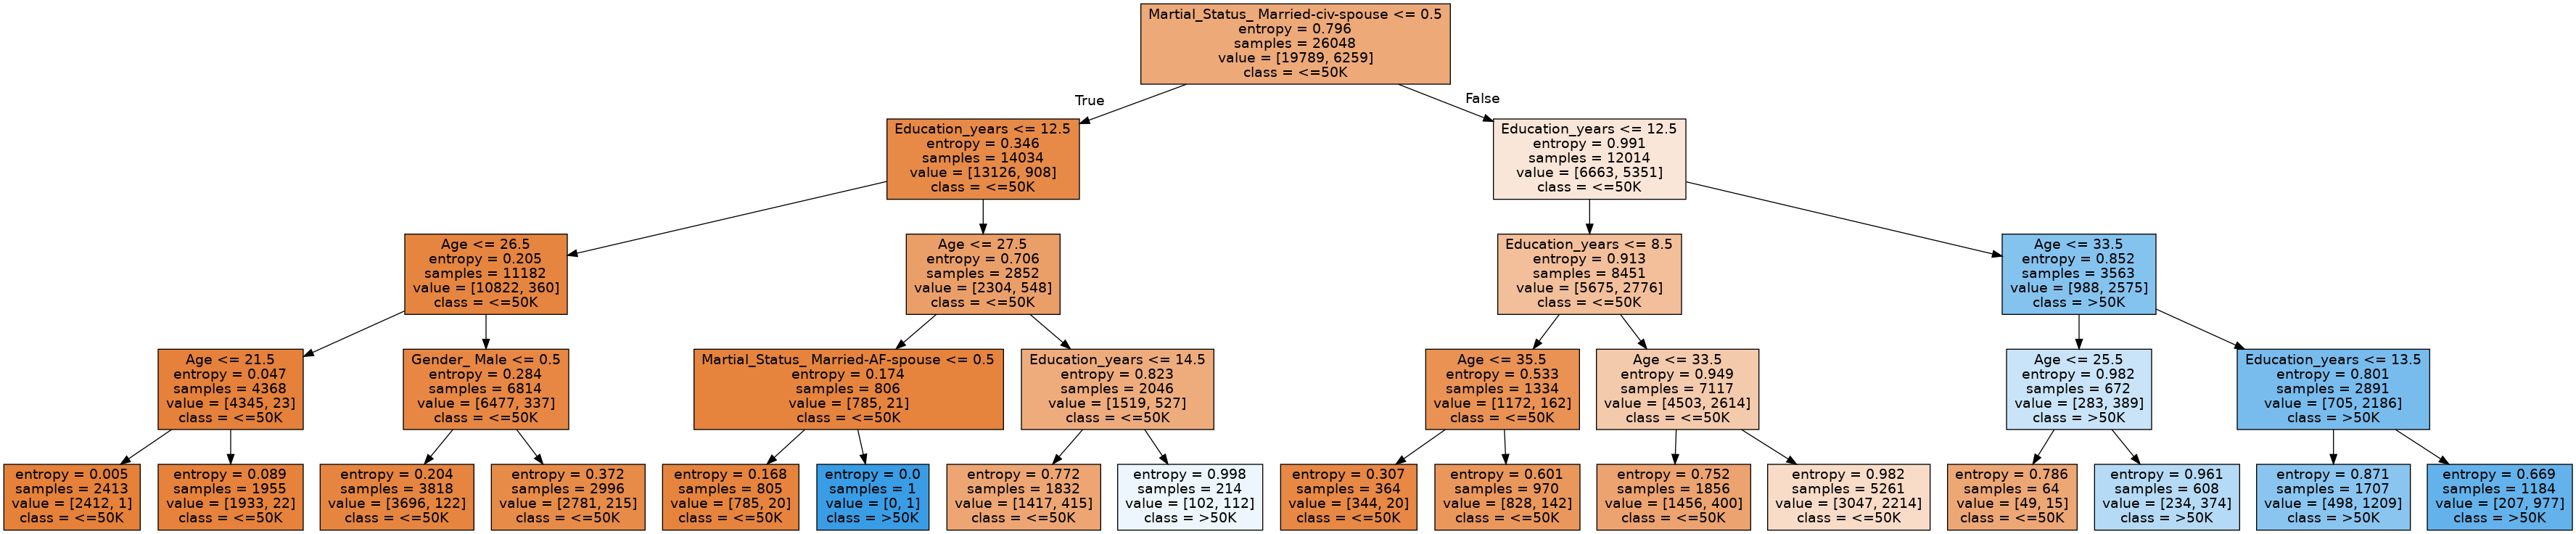

In [46]:
# Create DOT data
dot_data = tree.export_graphviz(censusTree, out_file=None,filled=True,
                                feature_names=X_labels,  
                                class_names=["<=50K", ">50K"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Logistic Regression

In [47]:
# Fit the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
census_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
census_LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
# Predict using Test Dataset
yhat = np.asarray(census_LR.predict(X_testset))
yhat [0:5]

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [49]:
# Calculate the probability 
yhat_prob = census_LR.predict_proba(X_testset)
yhat_prob

array([[0.56446425, 0.43553575],
       [0.84951651, 0.15048349],
       [0.71516277, 0.28483723],
       ...,
       [0.8078423 , 0.1921577 ],
       [0.62349463, 0.37650537],
       [0.53677669, 0.46322331]])

## Logistic regression model evaluation

In [50]:
# Check accuracy of model
from sklearn import metrics
print("Train set Accuracy: ","%.2f" % metrics.accuracy_score(y_trainset, census_LR.predict(X_trainset)))
print("Test set Accuracy: ","%.2f" % metrics.accuracy_score(y_testset, yhat))

Train set Accuracy:  0.76
Test set Accuracy:  0.76


In [51]:
# Calculate Jaccard Index
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Index: '"%.2f" %jaccard_similarity_score(y_testset, yhat))

Jaccard Index: 0.76


In [52]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_testset, yhat) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',"%.2f" %accuracy_score(y_testset, yhat))
print ('Report : ')
print (classification_report(y_testset, yhat))

Confusion Matrix :
[[4931    0]
 [1582    0]]
Accuracy Score : 0.76
Report : 
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4931
        >50K       0.00      0.00      0.00      1582

   micro avg       0.76      0.76      0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
#Compute precision and recall
#Skipping this here, model did not perform well at all

#precision_score = 0/(664+284) # TP/TP+FP
#print('Precision socore: ',"%.2f" %precision_score)

#recall_score = 664/(664+918) # TP/TP+FN
#print ('Recall Score: ',"%.2f" %recall_score)

In [54]:
# Calculate LogLoss
from sklearn.metrics import log_loss
print('LogLoss: ',"%.2f" % log_loss(y_testset, yhat_prob))

LogLoss:  0.57


## K- Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [57]:
# Make predictions
yhat = neigh.predict(X_testset)
yhat[0:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K'], dtype=object)

In [58]:
# Check accuracy of model
from sklearn import metrics
print("Train set Accuracy: ","%.2f" % metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ","%.2f" % metrics.accuracy_score(y_testset, yhat))

Train set Accuracy:  0.81
Test set Accuracy:  0.74


In [59]:
# Try different Ks
# In this case, we want to try up to K=10
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68585905, 0.74650699, 0.71303547, 0.74251497, 0.71933057,
       0.74389682, 0.73284201, 0.74558575, 0.73760172])

In [60]:
print(min(mean_acc))
print(max(mean_acc))

0.6858590511285122
0.7465069860279441


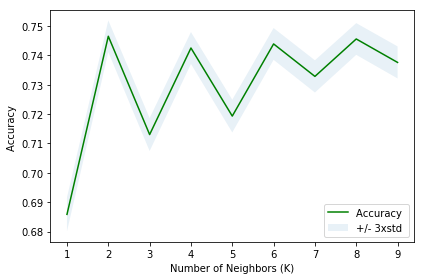

In [61]:
# Plot accuracy of different numbers of neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Support Vector Machine 

In [62]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_trainset, y_trainset) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
# Make predictions
yhat = clf.predict(X_testset)
yhat [0:5]

array([' <=50K', ' <=50K', ' >50K', ' >50K', ' <=50K'], dtype=object)

In [64]:
# Evaluate peformance
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [65]:
# Function to plot confusion matrix and normalize data if necessary by setting it to "true"
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

       <=50K       0.78      0.94      0.86      4931
        >50K       0.51      0.19      0.28      1582

   micro avg       0.76      0.76      0.76      6513
   macro avg       0.65      0.57      0.57      6513
weighted avg       0.72      0.76      0.71      6513

Confusion matrix, without normalization
[[4639  292]
 [1281  301]]


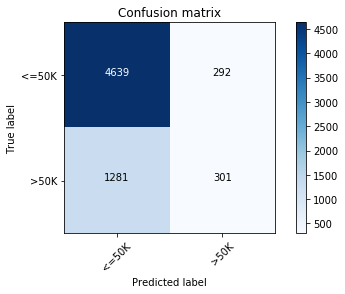

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_testset, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["<=50K", ">50K"],normalize= False,  title='Confusion matrix')

In [67]:
#Compute precision and recall

precision_score = 301/(301+292) # TP/TP+FP
print('Precision socore: ',"%.2f" %precision_score)

recall_score = 301/(301+1281) # TP/TP+FN
print ('Recall Score: ',"%.2f" %recall_score)

Precision socore:  0.51
Recall Score:  0.19


In [68]:
# Check accuracy of model
from sklearn import metrics
print("Train set Accuracy: ","%.2f" % metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ","%.2f" % metrics.accuracy_score(y_testset, yhat))

Train set Accuracy:  0.78
Test set Accuracy:  0.76


In [69]:
# See F1 score
from sklearn.metrics import f1_score
print("Avg F1-score: %.2f" % f1_score(y_testset, yhat, average='weighted'))

Avg F1-score: 0.71


In [70]:
# See Jaccard Similarity Score
from sklearn.metrics import jaccard_similarity_score
print("Jaccard score: %.2f" % jaccard_similarity_score(y_testset, yhat))

Jaccard score: 0.76
